### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

**该项目主要是研究在不同的条件下说出同等大小的列表中墨色名称的时间，所以因变量就是读出墨色名称的时间**  
**自变量就是不同条件下的各种情况，即文字与油墨颜色是否一致**

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

**假设检验问题：在相同大小的列表中，文字与墨色名称是否相同对参与者全部说出打印颜色耗时是否有差异性** 

**指定假设集：**
1. 墨色与文字相同，说出墨色名称所消耗平均时间的总体均值，记为$miu_{equal}$  
2. 墨色与文字不同，说出墨色名称所消耗平均时间的总体均值，记为$miu_{diff}$  


**null hypothesis:不一致文字条件下不会影响参与者说出打印颜色耗时**  
$H_0$ : $miu_{equal} = miu_{diff}$ 

**alternavite hypothesis:不一致文字条件下会影响参与者说出打印颜色耗时**

$H_1$ : $miu_{equal} \neq miu_{diff}$

**因为此次选择样本数量为24（少于30），且进行的是同一样本数据不同条件的比对，它们是相关样本，所以选择配对t检验，备选假设中为不等于，需要找出参数的变化，所以选择双尾检验**

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

**数据的描述统计信息**  

 center | congruent | incongruent
---|---|---
mean | 14.05 | 22.02
median | 14.36 | 21.018

spread | congruent | incongruent
---|---|---
std | 3.48 | 4.70
range | 13.70 | 19.57
IQR | 4.30 | 5.33


In [62]:
# 在这里执行你的分析
# 数据集载入及清理功能包
import pandas as pd

# 数据集转换及数学统计处理的常用功能包
import numpy as np
from scipy import stats
# 数据集可视化常用功能包
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['simhei']  # 设置加载的字体名
plt.rcParams['axes.unicode_minus'] = False
print("导入完成")

导入完成


In [63]:
#读取数据集
df = pd.read_csv('stroopdata.csv')
print(df.sample(3))
print('-'*40)
print(df.describe())
print('-'*40)
print(df.info())
print('-'*40)

    Congruent  Incongruent
9      14.480       26.282
12     15.073       17.510
17     10.639       20.429
----------------------------------------
       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes
None
----------------------------------------


(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

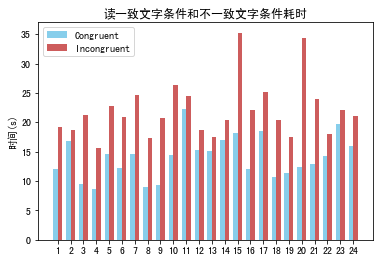

In [22]:
# 在这里创建可视化图表
ind = np.arange(len(df)) # the x locations for the groups
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, df.Congruent, width,color='SkyBlue', label='Congruent')
rects2 = ax.bar(ind + width/2, df.Incongruent, width,color='IndianRed', label='Incongruent')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('时间(s)')
ax.set_title('读一致文字条件和不一致文字条件耗时')
ax.set_xticks(ind)
ax.set_xticklabels(df.index+1)
ax.legend();

**通过图中数据可以看出相同大小情况下，读取不一致文字条件耗时比读取一致文字条件耗时长**

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

参考：http://www.statstutor.ac.uk/resources/uploaded/paired-t-test.pdf
1. Calculate the difference (di = yi − xi) between the two observations on each pair,
making sure you distinguish between positive and negative differences.
2. Calculate the mean difference, ¯d.
3. Calculate the standard deviation of the differences, sd, and use this to calculate the
standard error of the mean difference, SE(
¯d) = √
sd
n
4. Calculate the t-statistic, which is given by T =
¯d
SE(
¯d)
. Under the null hypothesis,
this statistic follows a t-distribution with n − 1 degrees of freedom.
5. Use tables of the t-distribution to compare your value for T to the tn−1 distribution.
This will give the p-value for the paired t-test.

In [71]:
# 在这里执行统计检验
#均值偏差
diff_mean = df.Congruent.mean() - df.Incongruent.mean()
print('Congruent与Incongruent均值偏差:{0:.2f}'.format(diff_mean))
n = len(df)
#标准偏差 因为n<30，所以Degrees of Freedom需要减1
sstd = np.std(df.Congruent-df.Incongruent,ddof=1)
se = sstd/np.sqrt(n)
print('sstd={:.2f},se={:.2f}'.format(sstd,se))
t = diff_mean/se
t

Congruent与Incongruent均值偏差:-7.96
sstd=4.86,se=0.99


-8.020706944109955

Confidence interval  
d ± t
∗
sd
√
n
or, equivalently ¯d ± (t
∗ × SE(
¯d))

In [69]:
t2 = sstd/np.sqrt(n-1)
(diff_mean + t2*se,diff_mean - t2*se)

(-6.935811628938246, -8.993771704395083)

In [70]:
#参考：https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.ttest_rel.html
#使用stats的配对样本t检验计算p-value
stats.ttest_rel(df.Congruent,df.Incongruent,axis=0)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

**p-value=4.10e-08 远小于 0.05，所以拒绝原假设，读相同大小下，不一致文字条件具有统计显著性，即显示的文字与它们的打印颜色不匹配时对实验者的阅读时间会产生影响。**